In [1]:
from PIL import Image, ImageDraw
import numpy as np

In [2]:
xs = []; ys = [];
with open('../data/DS8.txt', 'r') as f:
    for line in f:
        y, x = tuple(map(int, line.split()))
        xs.append(x)
        ys.append(y)
xs = np.array(xs)
ys = np.array(ys)

$ \alpha^{\circ} = 10*(8+1) = 90^{\circ}$
<br>
$\alpha = 1.571$

In [3]:
# function to display transformation matrix
def display_matrix(M):
    print(f"{M[0][0].round(): 7}{M[0][1].round(): 7}{M[0][2].round(): 7}")
    print(f"{M[1][0].round(): 7}{M[1][1].round(): 7}{M[1][2].round(): 7}")
    print(f"{M[2][0].round(): 7}{M[2][1].round(): 7}{M[2][2].round(): 7}")

In [4]:
alpha = 1.571  # Rotation angle
# Get the rotation matrix
rotation_matrix = np.array([
    [np.cos(alpha), np.sin(alpha), 0],
    [-np.sin(alpha), np.cos(alpha), 0],
    [480 * (1 - np.cos(alpha)) + 480 * np.sin(alpha), 480 * (1 - np.cos(alpha)) - 480 * np.sin(alpha), 1]
])

# Add the column of 1s; Put the points in (point_cnt, 3) shape
points = np.array([xs, ys, np.ones_like(xs)]).transpose()

# Rotate the points
points_rotated = points @ rotation_matrix

xs_rotated = points_rotated[:, 0]
ys_rotated = points_rotated[:, 1]

In [5]:
print("Transformation matrix: ")
display_matrix(rotation_matrix)

Transformation matrix: 
   -0.0    1.0    0.0
   -1.0   -0.0    0.0
  960.0    0.0    1.0


### We have coordinates of rotated points -> plot them on image

In [6]:
# FFFFFF - white color
img = Image.new("RGB", size=(960, 960), color="#FFFFFF")
img_rotated = Image.new("RGB", size=(960, 960), color="#FFFFFF")
draw = ImageDraw.Draw(img)
draw_rotated = ImageDraw.Draw(img_rotated)

In [7]:
# 0000FF - blue color
for x, y in zip(xs, ys):
    draw.point((x, y), fill="#0000FF")
for x_rotated, y_rotated in zip(xs_rotated, ys_rotated):
    draw_rotated.point((x_rotated, y_rotated), fill="#0000FF")

In [8]:
img.save("default_image.png")
img_rotated.save("rotated_image.png")

In [9]:
# also display the rotation point
draw.ellipse((480-5, 480-5, 480+5, 480+5), fill = 'red', outline ='red')
draw_rotated.ellipse((480-5, 480-5, 480+5, 480+5), fill = 'red', outline ='red')

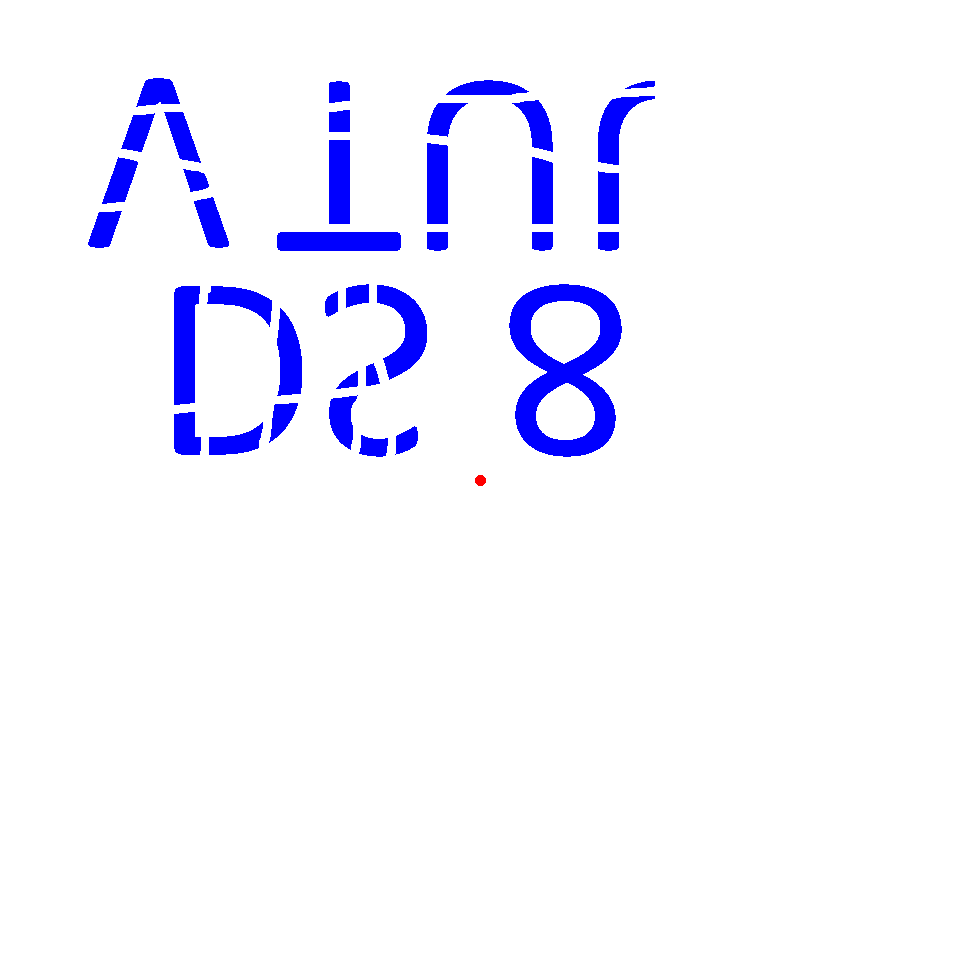

In [10]:
img

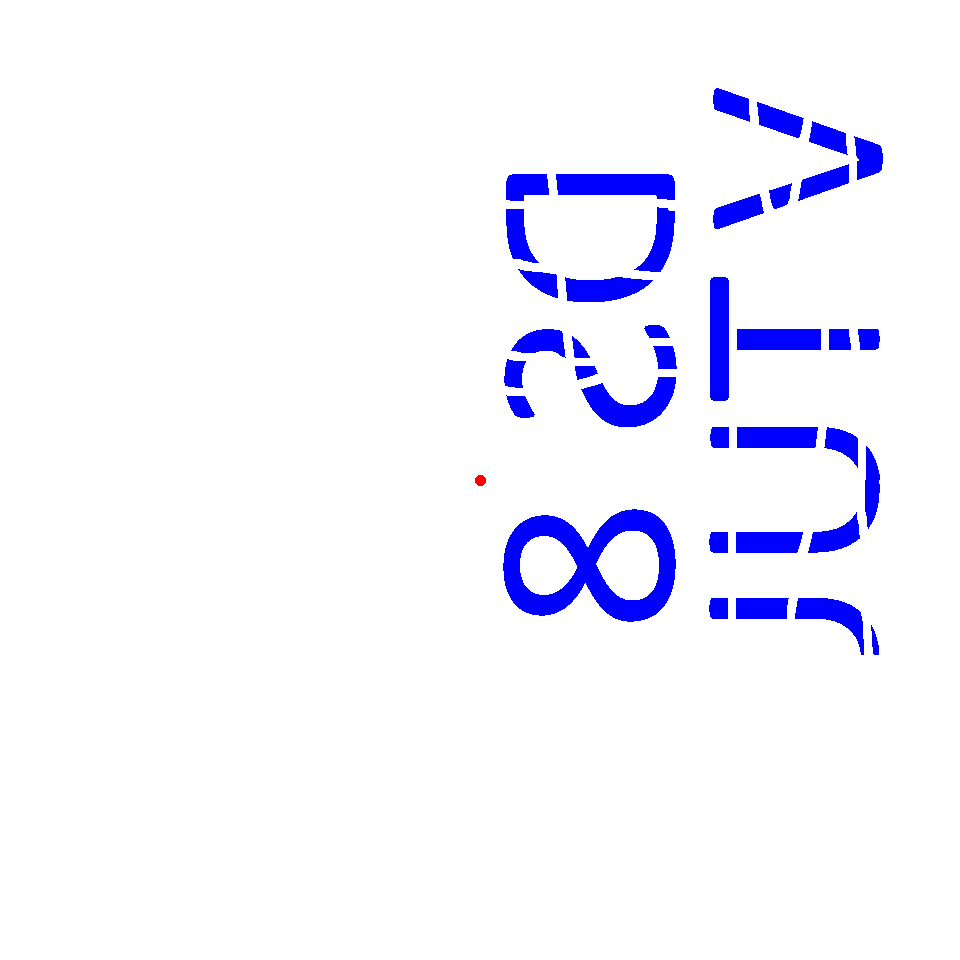

In [11]:
img_rotated